In [ ]:
#@title Part 1 (a)
# we are selecting problem2

import numpy as np
import pandas as pd 


samples=[]
names=['sample1','sample2','sample3','sample4']
def problem02(x):
  samples.append(np.sin(x)+np.sin((10/3)*x))
  return np.sin(x)+np.sin((10/3)*x)


problem02(2)
problem02(3.5)
problem02(2.1)
problem02(2.4)

samples = np.asarray(samples)
samples = samples.reshape(-1,1)

In [ ]:
names=pd.get_dummies(names)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF
import matplotlib.pyplot as plt
import numpy as np

# Random seeds
np.random.seed(seed=0)  # Set seed for NumPy
random_state = 0

# Generate features, and take norm for use with target
x = samples
y = names

# Create kernel and define GPR
kernel = RBF() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(x, y)



GaussianProcessRegressor(kernel=RBF(length_scale=1) + WhiteKernel(noise_level=1),
                         random_state=0)

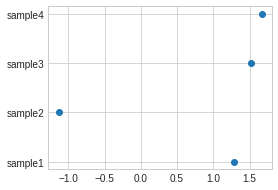

In [ ]:
# Create test data
x_test = samples
y_test = names
 

# Initialize plot
f, ax = plt.subplots(1, 1, figsize=(4, 3))

# Squeeze data
names=['sample1','sample2','sample3','sample4']
x = samples
y = names
x_test = x_test
y_test = y_test

# Plot the training data
ax.scatter(x, y)


In [ ]:
# now getting standard deiation 
np.std(samples)

1.1441007103721437

In [ ]:
pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Part 1 (b)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
warnings.filterwarnings("ignore")

In [ ]:
x = samples
y = names
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42) 

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
def black_box_function(C):
    model = SVC(C = C)
    model.fit(X_train_scaled, y_train)
    y_score = model.decision_function(X_test_scaled)
    f = roc_auc_score(y_test, y_score)
    return f
pbounds = {"C": [0.1, 10]}
optimizer = BayesianOptimization(f = black_box_function,pbounds = pbounds, verbose = 2,random_state = 4)
optimizer.maximize(init_points = 5, n_iter = 10)
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   |     C     |
-------------------------------------
| 1         | 1.0       | 9.674     |
| 2         | 1.0       | 5.518     |
| 3         | 1.0       | 9.73      |
| 4         | 1.0       | 7.177     |
| 5         | 1.0       | 7.008     |
| 6         | 1.0       | 0.1023    |
| 7         | 1.0       | 0.1013    |
| 8         | 1.0       | 0.1005    |
| 9         | 1.0       | 10.0      |
| 10        | 1.0       | 0.1008    |
| 11        | 1.0       | 10.0      |
| 12        | 1.0       | 0.1017    |
| 13        | 1.0       | 9.999     |
| 14        | 1.0       | 0.1005    |
| 15        | 1.0       | 10.0      |
Best result: {'C': 9.6735954062354}; f(x) = 1.0.


In [ ]:
df = pbounds
df

{'C': [0.1, 10]}

Best result: {'C': 1.923279309285134, 'degree': 3.0}; f(x) = 1.000.


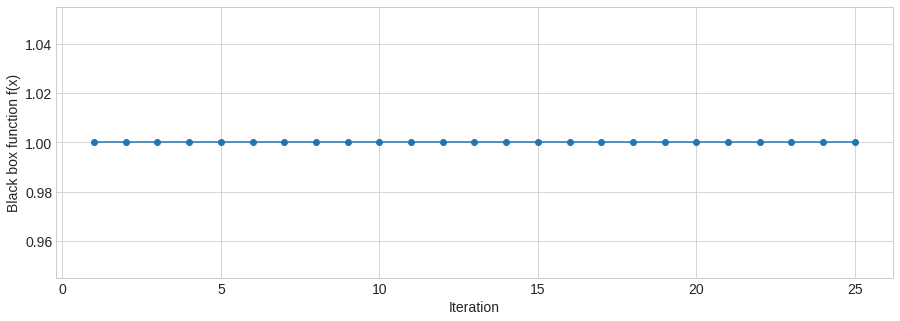

In [ ]:
optimizer = BayesianOptimization(f = None, 
                                 pbounds = {"C": [0.01, 10], 
                                            "degree": [1, 5]}, 
                                 verbose = 2, random_state = 1234)
utility = UtilityFunction(kind = "ucb", kappa = 1.96, xi = 0.01)
def black_box_function(C, degree):
    model = SVC(C = C, degree = degree)
    model.fit(X_train_scaled, y_train)
    y_score = model.decision_function(X_test_scaled)
    f = roc_auc_score(y_test, y_score)
    return f
for i in range(25):
    next_point = optimizer.suggest(utility)
    next_point["degree"] = int(next_point["degree"])
    target = black_box_function(**next_point)
    try:
        optimizer.register(params = next_point, target = target)
    except:
        pass
print("Best result: {}; f(x) = {:.3f}.".format(optimizer.max["params"], optimizer.max["target"]))
plt.figure(figsize = (15, 5))
plt.plot(range(1, 1 + len(optimizer.space.target)), optimizer.space.target, "-o")
plt.grid(True)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Black box function f(x)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
#@title Part 1 (c) Using sample data
import math
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [ ]:
user = list(range(0,10000))
m1 = np.random.normal(100,10,10000)
m2 = np.random.normal(105,5,10000)
m3 = np.random.normal(95,10,10000)
m4 = np.random.normal(100,5,10000)
df = pd.DataFrame({"user":user, "m1":m1,"m2":m2,"m3":m3,"m4":m4})
df.head()

,user,m1,m2,m3,m4
0,0,114.940791,101.134589,101.530695,99.731016
1,1,97.948417,102.993725,104.302551,103.407506
2,2,103.130677,104.423216,99.051826,93.501676
3,3,91.459043,110.057777,97.040025,103.820954
4,4,74.470102,112.566178,86.772344,100.565457


Text(0.5, 1.0, 'Distribution of Rewards by Message')

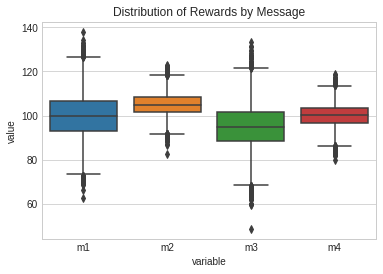

In [ ]:
sns.boxplot(x="variable", y="value", data=pd.melt(df[['m1','m2','m3','m4']]))
plt.title("Distribution of Rewards by Message")

In [ ]:
N = len(df.index)       
d = 4                  
Qt_a = 0
Nt_a = np.zeros(d)
c = 1                  
sum_rewards = np.zeros(d) 
hist_t = []
hist_achieved_rewards = [] 
hist_best_possible_rewards = [] 
hist_random_choice_rewards = []
N

10000

In [ ]:
for t in range(0,N):
    UCB_Values = np.zeros(d) 
    action_selected = 0
    for a in range(0, d):
        if (Nt_a[a] > 0):
            ln_t = math.log(t)
            hist_t.append(ln_t)
            Qt_a = sum_rewards[a]/Nt_a[a]
            ucb_value = Qt_a + c*(ln_t/Nt_a[a]) 
            UCB_Values[a] = ucb_value
        elif (Nt_a[a] == 0):
            UCB_Values[a] = 1e500
        
    action_selected = np.argmax(UCB_Values)
    Nt_a[action_selected] += 1
    reward = df.values[t, action_selected+1]
    sum_rewards[action_selected] += reward

In [ ]:
    r_ = df.values[t,[1,2,3,4]]     
    r_best = r_[np.argmax(r_)]      
    
    pick_random = random.randrange(d)
    r_random = r_[pick_random]
    if len(hist_achieved_rewards)>0:
        hist_achieved_rewards.append(hist_achieved_rewards[-1]+reward)
        hist_best_possible_rewards.append(hist_best_possible_rewards[-1]+r_best)
        hist_random_choice_rewards.append(hist_random_choice_rewards[-1]+r_random)
    else:
        hist_achieved_rewards.append(reward)
        hist_best_possible_rewards.append(r_best)
        hist_random_choice_rewards.append(r_random)

In [ ]:
print("Reward if we choose randonmly {0}".format(hist_random_choice_rewards[-1]))
print("Reward of our UCB method {0}".format(hist_achieved_rewards[-1]))

Reward if we choose randonmly 96.58829751702206
Reward of our UCB method 96.58829751702206


Text(0.5, 1.0, 'Number of times each Message was Selected')

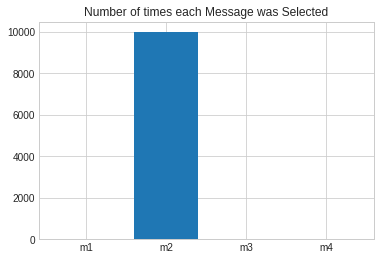

In [ ]:
plt.bar(['m1','m2','m3','m4'],Nt_a)
plt.title("Number of times each Message was Selected")

In [ ]:
#@title Part 2 Supervised Learning
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
df_train = pd.read_excel("/content/Dataset.xlsx")
df_PartC = pd.read_excel("/content/Dataset.xlsx")

In [ ]:
df_train.head()

,Range_L_hallux,St_Dev_L_hallux,Skewness_L_hallux,Kurtosis_L_hallux,DFR_L_hallux,Entropy_L_hallux,Mean_L_toes,Range_L_toes,St_Dev_L_toes,DFR_L_mag_x,Label
0,558,192,1,-1,0,-6714,277,1182,301,1,downstairs
1,1971,401,2,6,0,-19240,420,1761,507,1,downstairs
2,1971,381,2,7,0,-19344,566,1761,545,1,downstairs
3,1827,469,1,0,0,-26251,729,1849,613,1,downstairs
4,1827,509,0,-1,0,-28205,870,1948,736,1,downstairs


In [ ]:
df_train.isnull().values.any()

False

In [ ]:
df_train.isnull().any().any()

False

In [ ]:
df_train["Label"].unique()

array(['downstairs', 'upstairs', 'walking', 'spinning_bike'], dtype=object)

In [ ]:
halluxmax=df_train['Range_L_hallux'].max(skipna = False)
halluxmin=df_train['Range_L_hallux'].min(skipna = False)
print("The range of values for tbodyAccmean()-X are: ")
print("Max value: ",halluxmax)
print("Min value: ",halluxmin)

The range of values for tbodyAccmean()-X are: 
Max value:  2285
Min value:  0


In [ ]:
Skewness_L_halluxMax=df_train['Skewness_L_hallux'].max(skipna = False)
Skewness_L_halluxMin=df_train['Skewness_L_hallux'].min(skipna = False)
print("The range of values for tgravityAcc-mean()-X are: ")
print("Max value: ",Skewness_L_halluxMax)
print("Min value: ",Skewness_L_halluxMin)

The range of values for tgravityAcc-mean()-X are: 
Max value:  9
Min value:  -3


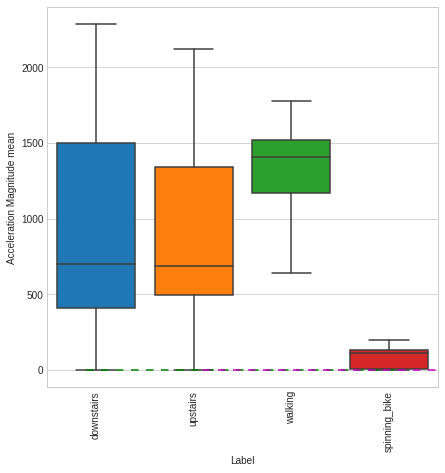

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Label', y='Range_L_hallux',data=df_train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

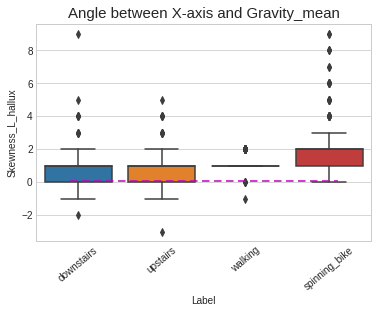

In [ ]:
sns.boxplot(x='Label', y='Skewness_L_hallux', data=df_train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

In [ ]:
#Creating a dataframe of Walking activity 
walkingactivity=df_train[df_train['Label']=='walking']
#For walking 
Mean_L_toesMax=walkingactivity['Mean_L_toes'].max(skipna = False)
Mean_L_toesMin=walkingactivity['Mean_L_toes'].min(skipna = False)
print("The range of values for Mean_L_toes of 'walking' activity are: ")
print("Max value: ",Mean_L_toesMax)
print("Min value: ",Mean_L_toesMin)

The range of values for Mean_L_toes of 'walking' activity are: 
Max value:  354
Min value:  136


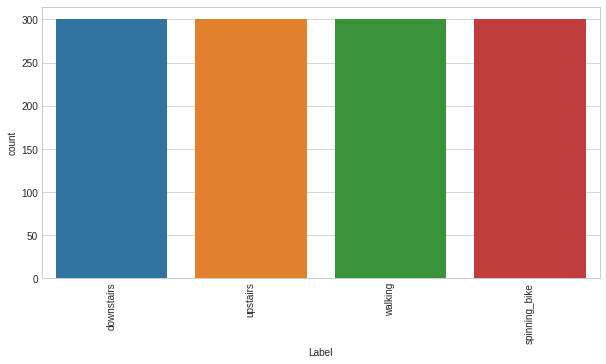

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Label", data=df_train)
plt.xticks(x = df_train['Label'],  rotation='vertical')
plt.show()

In [ ]:
df_train["DFR_L_mag_x"].unique()

array([1])

In [ ]:
X = pd.DataFrame(df_train.drop(['Label','DFR_L_mag_x'],axis=1))
Y = df_train.Label.values.astype(object)

X.shape, Y.shape

((1200, 9), (1200,))

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [ ]:
# encoding train labels 
encoder.fit(Y)
y = encoder.transform(Y)
y.shape

(1200,)

In [ ]:
y[1]

0

In [ ]:
encoder.classes_

array(['downstairs', 'spinning_bike', 'upstairs', 'walking'], dtype=object)

In [ ]:
#@title Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)
X[1]

array([ 1.85241246,  1.18077064,  0.69669435,  0.37832937,  0.        ,
       -1.37070192,  0.95446268,  1.04169954,  0.95976374])

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 99)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((960, 9), (240, 9), (960,), (240,))

In [ ]:
svc = SVC() 

In [ ]:
np.any(np.isnan(X_train)) #true
np.all(np.isfinite(X_train)) #false

True

In [ ]:
np.isnan(df_train.any()) #and gets False
np.isfinite(df_train.all()) #and gets True

Range_L_hallux       True
St_Dev_L_hallux      True
Skewness_L_hallux    True
Kurtosis_L_hallux    True
DFR_L_hallux         True
Entropy_L_hallux     True
Mean_L_toes          True
Range_L_toes         True
St_Dev_L_toes        True
DFR_L_mag_x          True
Label                True
dtype: bool

In [ ]:
# X_train = X_train.astype(np.float64)
# y_train = y_train.astype(np.float64)

In [ ]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.fillna(999, inplace=True)

In [ ]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = svc.predict(X_valid)

In [ ]:
print('Model accuracy For SVM: {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
acc1 = accuracy_score(y_valid, y_pred)*100

Model accuracy For SVM: 0.8292


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_KNN = knn.predict(X_valid)

In [ ]:
print('Model accuracy KNN: {0:0.4f}'. format(accuracy_score(y_valid, y_pred_KNN)))
acc2 = accuracy_score(y_valid, y_pred_KNN)*100

Model accuracy KNN: 0.8333


In [ ]:
from sklearn.metrics import confusion_matrix
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)
y_pred_XGB = my_model.predict(X_valid)

In [ ]:
print('Model accuracy of XGB: {0:0.4f}'. format(accuracy_score(y_valid, y_pred_XGB)))
acc3 = accuracy_score(y_valid, y_pred_XGB)*100

Model accuracy of XGB: 0.8958


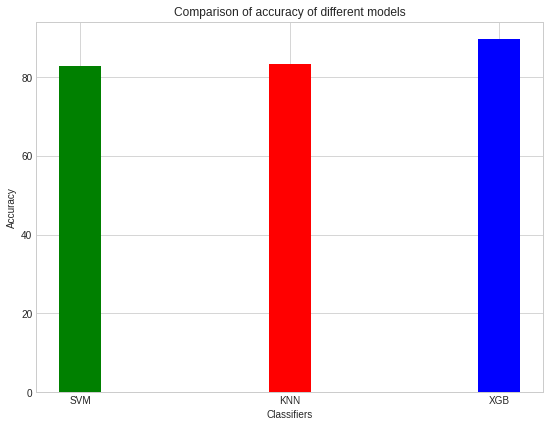

In [ ]:
plt.figure(figsize=(20,15))

left_acc = [1,2,3]
height_acc = [acc1,acc2,acc3]
tick_label_acc = ['SVM','KNN','XGB']

plt.subplot(2,2,1);
plt.bar(left_acc, height_acc, tick_label=tick_label_acc, width=0.2, color = ['green', 'red','blue']);
plt.xlabel("Classifiers");
plt.ylabel('Accuracy');
plt.title('Comparison of accuracy of different models')

plt.show()

## Summary
As for the result the XGB is clearly generating more accuracy than KNN and Svm for this dataset and the graphs is shown the accuracy on the y-axix and classifier on the x-axis.

In [ ]:
import numpy as np
from scipy.cluster.vq import whiten, kmeans, vq, kmeans2

In [ ]:

print(df_train)

      Range_L_hallux  St_Dev_L_hallux  Skewness_L_hallux  Kurtosis_L_hallux  \
0                558              192                  1                 -1   
1               1971              401                  2                  6   
2               1971              381                  2                  7   
3               1827              469                  1                  0   
4               1827              509                  0                 -1   
...              ...              ...                ...                ...   
1195             132               41                  2                  2   
1196             131               35                  2                  5   
1197             128               31                  3                  7   
1198             128               34                  2                  5   
1199             128               40                  2                  2   

      DFR_L_hallux  Entropy_L_hallux  Mean_L_toes  

In [ ]:
dataset = df_train
  
print("Data :\n", dataset, "\n")

Data :
       Range_L_hallux  St_Dev_L_hallux  Skewness_L_hallux  Kurtosis_L_hallux  \
0                558              192                  1                 -1   
1               1971              401                  2                  6   
2               1971              381                  2                  7   
3               1827              469                  1                  0   
4               1827              509                  0                 -1   
...              ...              ...                ...                ...   
1195             132               41                  2                  2   
1196             131               35                  2                  5   
1197             128               31                  3                  7   
1198             128               34                  2                  5   
1199             128               40                  2                  2   

      DFR_L_hallux  Entropy_L_hallux  Mean_

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [ ]:
# function to plot the selected centroids
def plot(df_PartC, centroids):
    plt.scatter(df_PartC[:, 0], df_PartC[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],
                color = 'black', label = 'previously selected centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1],
                color = 'red', label = 'next centroid')
    plt.title('Select % d th centroid'%(centroids.shape[0]))
     
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

def distance(p1, p2):
    return np.sum((p1 - p2)**2)  

In [ ]:
df_PartC = df_PartC.iloc[:,:-1].values

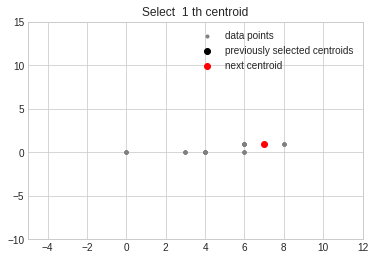

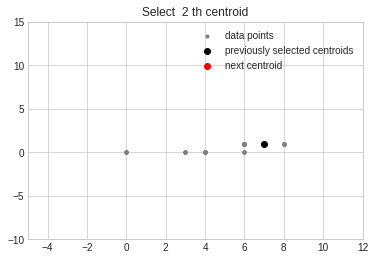

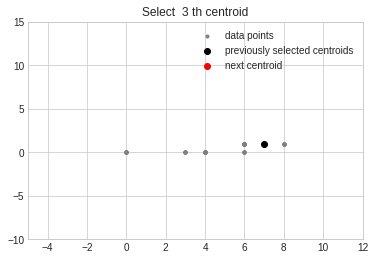

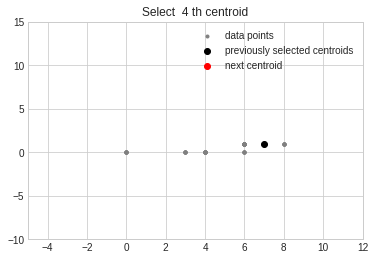

In [ ]:
def initialize(data, k):
    centroids = []
    centroids.append(data[np.random.randint(df_PartC.shape[0]), :])
    plot(data, np.array(centroids))

    for c_id in range(k - 1):
         
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)
        dist = np.array(dist)
        next_centroid = df_PartC[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plot(data, np.array(centroids))
    return centroids
  
# call the initialize function to get the centroids
centroids = initialize(df_PartC, k = 4)

In [ ]:
df_PartC.fillna(method ='ffill', inplace = True)
df_PartC.head()

,Range_L_hallux,St_Dev_L_hallux,Skewness_L_hallux,Kurtosis_L_hallux,DFR_L_hallux,Entropy_L_hallux,Mean_L_toes,Range_L_toes,St_Dev_L_toes,DFR_L_mag_x,Label
0,558,192,1,-1,0,-6714,277,1182,301,1,downstairs
1,1971,401,2,6,0,-19240,420,1761,507,1,downstairs
2,1971,381,2,7,0,-19344,566,1761,545,1,downstairs
3,1827,469,1,0,0,-26251,729,1849,613,1,downstairs
4,1827,509,0,-1,0,-28205,870,1948,736,1,downstairs


In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
  
X_principal.head()

,P1,P2
0,-0.004693,0.510594
1,0.916918,-0.399095
2,0.914817,-0.356713
3,0.949517,-0.026226
4,0.934420,0.123880


In [ ]:
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

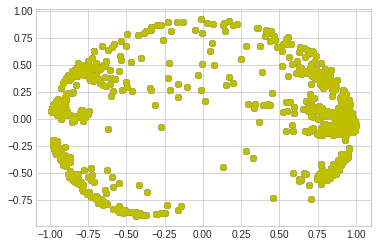

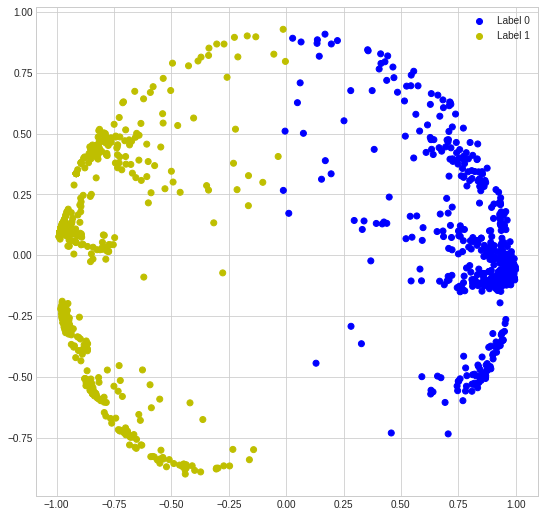

In [ ]:
colours = {}
colours[0] = 'b'
colours[1] = 'y'
  
cvec = [colours[label] for label in labels_rbf]
  
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
  
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

In [ ]:
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
  
labels_nn = spectral_model_nn.fit_predict(X_principal)

In [ ]:
affinity = ['rbf', 'nearest-neighbours']
s_scores = []
s_scores.append(silhouette_score(X, labels_rbf))
s_scores.append(silhouette_score(X, labels_nn))
print(s_scores)

[0.546706477171965, 0.16937323622369382]


# Summary
Spectral Clustering is a developing clustering technique that outperforms several existing clustering algorithms in so many circumstances. It considers each data point to be a graph node, transforming the clustering issue into a graph partitioning problem. The graph is showing the match and also the score in the upper cell.